In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date
from mechafil import data
import pandas as pd
import numpy as np

from agentfil.filecoin_model import FilecoinModel

In [3]:
simulation_start_date = datetime.today().date()
forecast_length = 365*2
end_date = simulation_start_date + timedelta(days=forecast_length)

num_agents = 20

In [6]:
filecoin_model = FilecoinModel(num_agents, simulation_start_date, end_date)

In [7]:
data_start_date = date(2021,3,15)
model_power_stats = []
cur_date = data_start_date
while cur_date < simulation_start_date:
    power_stats = filecoin_model.compute_macro(cur_date)
    model_power_stats.append(power_stats)
    
    cur_date += timedelta(days=1)
model_power_df = pd.DataFrame(model_power_stats)

In [8]:
# get historical stats for comparison
historical_stats = data.get_historical_network_stats(data_start_date, simulation_start_date, end_date)
scheduled_df = data.query_sector_expirations(data_start_date, end_date)
historical_stats['date'] = pd.to_datetime(historical_stats['date']).dt.date
scheduled_df['date'] = scheduled_df['date'].dt.date
merged_df = historical_stats.merge(scheduled_df, on='date', how='inner')

In [9]:
rbp0 = merged_df.iloc[0]['total_raw_power_eib']
qap0 = merged_df.iloc[0]['total_qa_power_eib']

<IPython.core.display.Javascript object>


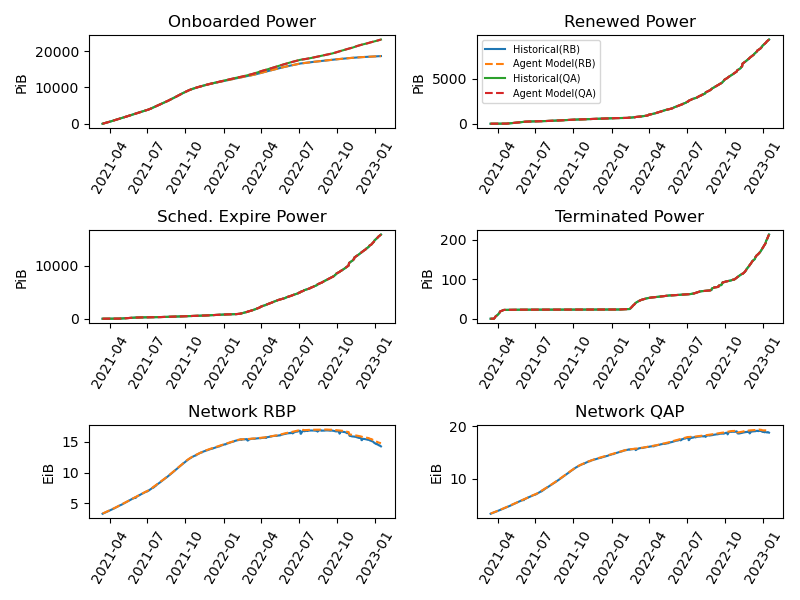

In [13]:
plt.figure(figsize=(8,6))

plt.subplot(3,2,1)
plt.plot(merged_df['date'], merged_df['day_onboarded_rb_power_pib'].cumsum(), label='Historical (RB)')
plt.plot(model_power_df['date'], model_power_df['day_onboarded_rb_power_pib'].cumsum(), linestyle='--', label='Agent Model (RB)')
plt.plot(merged_df['date'], merged_df['day_onboarded_qa_power_pib'].cumsum(), label='Historical (QA)')
plt.plot(model_power_df['date'], model_power_df['day_onboarded_qa_power_pib'].cumsum(), linestyle='--', label='Agent Model (QA)')
plt.xticks(rotation=60)
plt.title('Onboarded Power')
plt.ylabel('PiB')

plt.subplot(3,2,2)
plt.plot(merged_df['date'], merged_df['extended_rb'].cumsum(), label='Historical(RB)')
plt.plot(model_power_df['date'], model_power_df['day_extended_rb'].cumsum(), linestyle='--', label='Agent Model(RB)')
plt.plot(merged_df['date'], merged_df['extended_qa'].cumsum(), label='Historical(QA)')
plt.plot(model_power_df['date'], model_power_df['day_extended_qa'].cumsum(), linestyle='--', label='Agent Model(QA)')
plt.xticks(rotation=60)
plt.title('Renewed Power')
plt.ylabel('PiB')
plt.legend(fontsize=7)

plt.subplot(3,2,3)
plt.plot(merged_df['date'], merged_df['total_rb'].cumsum(), label='Historical(RB)')
plt.plot(model_power_df['date'], model_power_df['day_total_rb'].cumsum(), linestyle='--', label='Agent Model(RB)')
plt.plot(merged_df['date'], merged_df['total_qa'].cumsum(), label='Historical(QA)')
plt.plot(model_power_df['date'], model_power_df['day_total_qa'].cumsum(), linestyle='--', label='Agent Model(QA)')
plt.xticks(rotation=60)
plt.title('Sched. Expire Power')
plt.ylabel('PiB')

plt.subplot(3,2,4)
plt.plot(merged_df['date'], merged_df['terminated_rb'].cumsum(), label='Historical(RB)')
plt.plot(model_power_df['date'], model_power_df['day_terminated_rb'].cumsum(), linestyle='--', label='Agent Model(RB)')
plt.plot(merged_df['date'], merged_df['terminated_qa'].cumsum(), label='Historical(QA)')
plt.plot(model_power_df['date'], model_power_df['day_terminated_qa'].cumsum(), linestyle='--', label='Agent Model(QA)')
plt.xticks(rotation=60)
plt.title('Terminated Power')
plt.ylabel('PiB')

plt.subplot(3,2,5)
plt.plot(merged_df['date'], merged_df['total_raw_power_eib'], label='Historical')
plt.plot(model_power_df['date'], rbp0+model_power_df['day_network_rbp'].cumsum()/1024, linestyle='--', label='Agent Model(RB)')
plt.ylabel('EiB')
plt.title('Network RBP')
plt.xticks(rotation=60)

plt.subplot(3,2,6)
plt.plot(merged_df['date'], merged_df['total_qa_power_eib'], label='Historical')
plt.plot(model_power_df['date'], rbp0+model_power_df['day_network_qap'].cumsum()/1024, linestyle='--', label='Agent Model')
plt.ylabel('EiB')
plt.title('Network QAP')
plt.xticks(rotation=60)

plt.tight_layout()

# plt.plot(model_power_df['date'], model_power_df['network_rb'].cumsum())

<IPython.core.display.Javascript object>


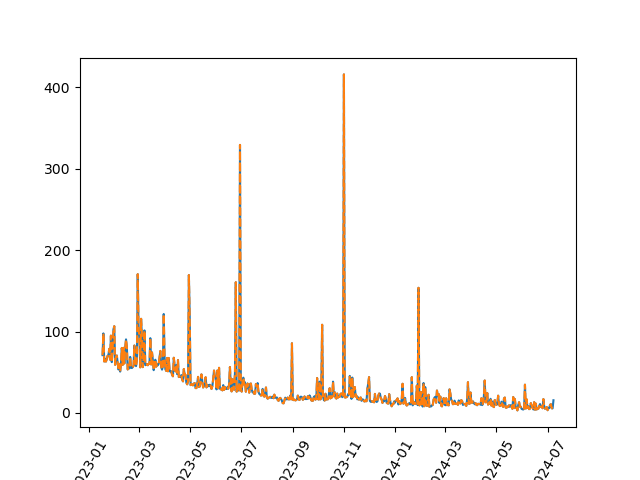

(array([19358., 19417., 19478., 19539., 19601., 19662., 19723., 19783.,
        19844., 19905.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [12]:
# check the future powers
future_scheduled_df = scheduled_df[scheduled_df['date'] >= simulation_start_date]
max_date = future_scheduled_df.iloc[-1]['date']

future_model_power_stats = []
cur_date = simulation_start_date
while cur_date < max_date:
    power_stats = filecoin_model.compute_macro(cur_date)
    future_model_power_stats.append(power_stats)
    
    cur_date += timedelta(days=1)
future_model_df = pd.DataFrame(future_model_power_stats)
    
plt.figure()
plt.plot(future_scheduled_df['date'], future_scheduled_df['total_rb'], label='Historical')
plt.plot(future_model_df['date'], future_model_df['day_total_rb'], label='Model', linestyle='--')
plt.xticks(rotation=60)